In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [24]:
# Load the CSV file to examine its contents
file_path = '1C_Table.csv'
data = pd.read_csv(file_path)
data

,Feature,Group,prediction,Unnamed: 3,Unnamed: 4
0,Akkermansia,R12T12,0.258,NaN,NaN
1,NaN,R3T3,0.219,NaN,NaN
2,NaN,R123T123,0.155,NaN,NaN
3,NaN,R123T3,0.213,NaN,NaN
4,One-carbon metabolic process,R12T12,0.557,NaN,NaN
5,NaN,R3T3,0.279,NaN,NaN
6,NaN,R123T123,0.276,NaN,NaN
7,NaN,R123T3,0.266,NaN,NaN
8,Pfam,R12T12,0.658,NaN,NaN
9,NaN,R3T3,0.478,NaN,NaN


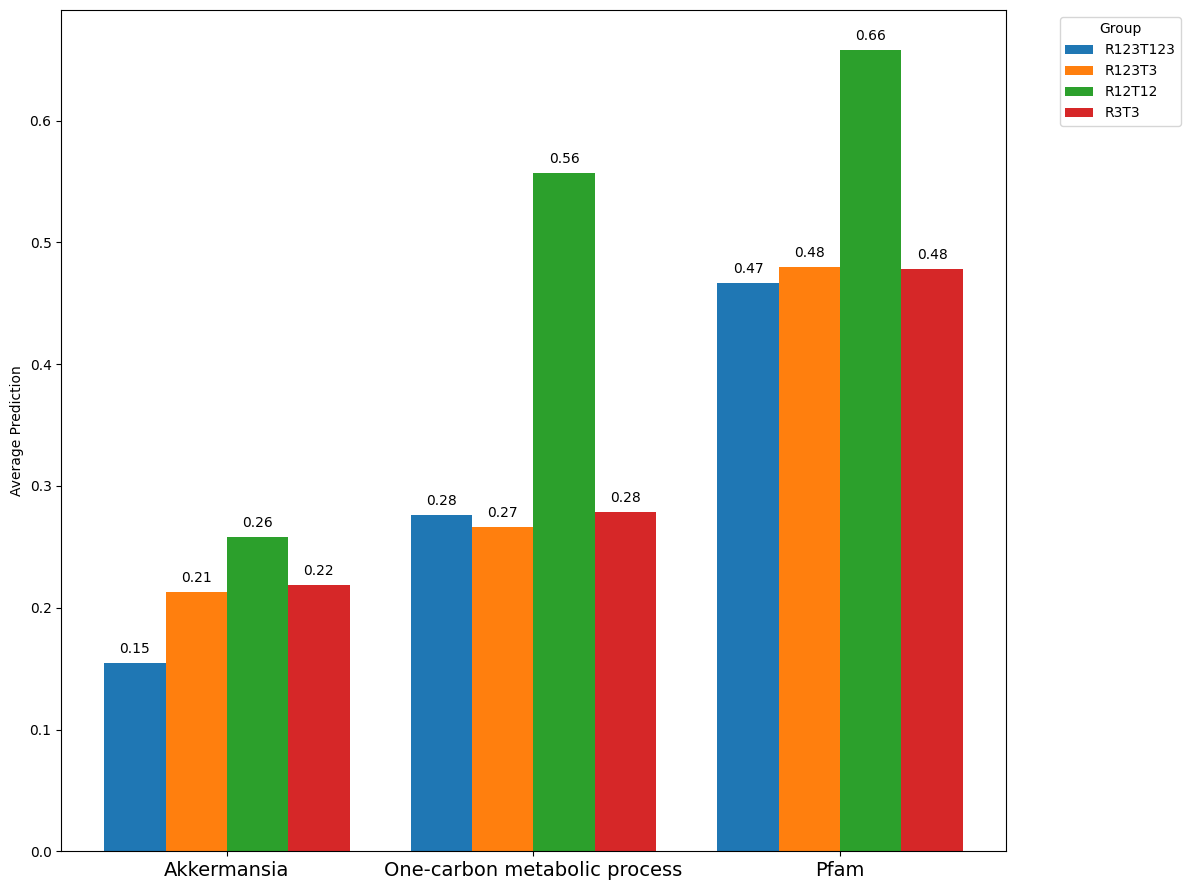

In [37]:
# Cleaning the data
cleaned_data = data[['Feature', 'Group', 'prediction']].copy()
cleaned_data['Feature'].fillna(method='ffill', inplace=True)

# Create a pivot table for better plotting with 'Group' as columns and 'Feature' as index
pivot_data = cleaned_data.pivot_table(values='prediction', index='Feature', columns='Group', aggfunc='mean')

# Corrected plotting with numpy imported for handling array operations
fig, ax = plt.subplots(figsize=(12, 9))

# Using a custom bar width and adjusting positions for spacing
bar_width = 0.2
num_groups = len(pivot_data.columns)
for i, group in enumerate(pivot_data.columns):
    ax.bar(x=np.arange(len(pivot_data.index)) + i * bar_width, height=pivot_data[group], 
           width=bar_width, label=group, align='center')

ax.set_xticks(np.arange(len(pivot_data.index)) + bar_width * (num_groups - 1) / 2)
ax.set_xticklabels(pivot_data.index)
plt.title('')
plt.ylabel('Average Prediction')
plt.xlabel('')
ax.tick_params(axis='x', labelsize=14) 
plt.xticks(rotation=0)
plt.legend(title='Group', bbox_to_anchor=(1.05, 1), loc='upper left')
# Annotate each bar with the numeric value
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 10), 
                textcoords='offset points')
plt.tight_layout()
plt.show()